# LAB 1



## Part 1

### Task 1.1

In [2]:
import numpy as np
from PIL import Image

from pathlib import Path

ima_path_list = list(Path("./data").glob("**/**.jpg"))

x, y = 128,128
n = len(ima_path_list)
Images = np.zeros((n,x,y,3))
for i,img_path in enumerate(ima_path_list):
    img = Image.open(img_path).convert("RGB")
    Images[i] = np.array(img.resize((x, y)))
    
Images.shape

(600, 128, 128, 3)

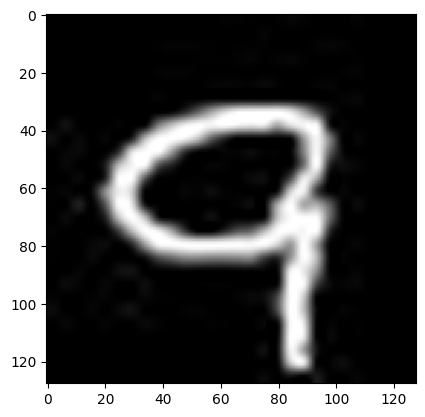

In [3]:
import matplotlib.pyplot as plt
def PlotSample(Images,index):
    plt.imshow(Images[index].astype(np.uint8))
    plt.show()
    
PlotSample(Images,61)

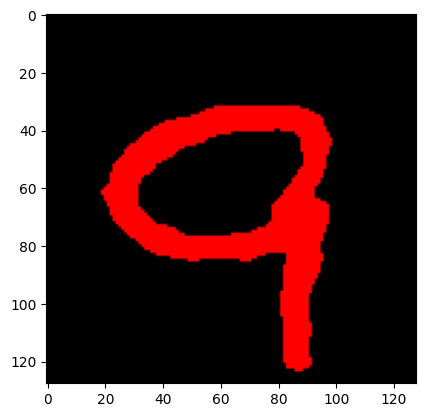

In [ ]:
def center_img(img):
    X = img.reshape(-1, 3) 
    Xc = X - np.mean(X, axis=0)
    return Xc.reshape(img.shape)

def standardize_img(img):
    X = img.reshape(-1, 3)
    Xstd = (X - np.mean(X, axis=0)) / (np.std(X, axis=0))
    return Xstd.reshape(img.shape)

def decorrelate_img(img):
    X = img.reshape(-1, 3) # reshape for matrix operations
    Xc = X - np.mean(X, axis=0)
    cov = (Xc.T @ Xc) / float(Xc.shape[0]) ## compute covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    decorrelated = Xc @ eigVecs
    return decorrelated.reshape(img.shape)

def whiten_img(img, eps=1e-5):
    X = img.reshape(-1, 3) 
    Xc = X - np.mean(X, axis=0)
    cov = (Xc.T @ Xc) / float(Xc.shape[0])
    eigVals, eigVecs = np.linalg.eig(cov)
    decorrelated = Xc @ eigVecs
    whitened = decorrelated / np.sqrt(eigVals + eps)
    return whitened.reshape(img.shape)

def PrepocessImages(Images, normalize=True, tostandardize=True, todecorrelate=False, towhiten=False):
    new_Images = Images.copy()
    for i in range(new_Images.shape[0]):
        img = new_Images[i]
        ## apply al possible preocessing steps
        if normalize:
            img = center_img(img)
        if tostandardize:
            img = standardize_img(img)
        if todecorrelate:
            img = decorrelate_img(img)
        if towhiten:
            img = whiten_img(img)
        new_Images[i] = img
    return new_Images

PlotSample(PrepocessImages(Images, normalize=True, tostandardize=True, todecorrelate=True, towhiten=True), 61)

### Task 1.2


    {
        0: {
            0 : [vect 1 , vect 2 , ... , vect n ],
            1 : [vect 1 , vect 2 , ... , vect n ],
            ...
        },
        1: {
            0 : [vect 1 , vect 2 , ... , vect n ],
            1 : [vect 1 , vect 2 , ... , vect n ],
            ...
        },
        ...
    }



In [ ]:
data = np.load("vecs.npy", allow_pickle=True).item()

print(data.keys())  
position_1 = data["3_pos"]
print(position_1.keys())  
print(position_1.items())


In [ ]:
for keys, embeding in position_1.items():
    print(keys)
    print(embeding)
    break

In [8]:
def getNumbers(data, position):
    embedings = []
    keys = []
    
    for key, embeding in data[position].items():
        embedings.append(embeding)
        keys.extend([key] * len(embeding))
        
    embeddings = np.vstack(embedings)                  
    return embeddings, np.array(keys)

In [9]:
getNumbers(data, "3_pos")

(array([[-0.     , -0.     , -0.     , ..., -0.     , -0.     , -0.     ],
        [-0.     , 69.77938, -0.     , ..., -0.     , -0.     , -0.     ],
        [-0.     , -0.     , -0.     , ..., -0.     , -0.     , -0.     ],
        ...,
        [-0.     , -0.     ,  0.     , ..., -0.     , -0.     , -0.     ],
        [-0.     , -0.     , -0.     , ..., -0.     , -0.     , -0.     ],
        [-0.     , -0.     , -0.     , ..., -0.     , -0.     , -0.     ]],
       shape=(1254, 1024), dtype=float32),
 array([0, 0, 0, ..., 9, 9, 9], shape=(1254,)))

In [ ]:
def randomPermutation(data, position):
    embeddings, keys = getNumbers(data, position)
    n = len(keys)
    index = np.arange(n)
    np.random.shuffle(index) ## shuffle the index to get random permutations
    return embeddings[index], keys[index]

randomPermutation(data, "3_pos")

(array([[-0.      , -0.      ,  9.72539 , ..., -0.      , -0.      ,
         -0.      ],
        [-0.      , -0.      , -0.      , ..., -0.      , -0.      ,
         -0.      ],
        [-0.      , -0.      ,  0.      , ..., -0.      , -0.      ,
         -0.      ],
        ...,
        [-0.      , -0.      , -0.      , ..., -0.      , -0.      ,
         26.477238],
        [-0.      , -0.      , -0.      , ..., -0.      , -0.      ,
         -0.      ],
        [-0.      , -0.      , -0.      , ..., -0.      , -0.      ,
         -0.      ]], shape=(1254, 1024), dtype=float32),
 array([2, 6, 9, ..., 6, 9, 7], shape=(1254,)))

## Part 2

### Task 2.1

1. It gets an accuracy of 0.2649

Orignal code:

    def predict(X):
        num_test=X.shape[0]
        Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
        
        for i in range(num_test):
            distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
            
            min_index= np.argmin(distances)
            Lpred[i]=Ltr_set[min_index]
        return Lpred

 L2 version:

    def predict(X):
        num_test=X.shape[0]
        Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
        
        for i in range(num_test):
            distances=np.sqrt(np.sum((Tr_set-X[i,:])**2,axis=1))
            
            min_index= np.argmin(distances)
            Lpred[i]=Ltr_set[min_index]
        return Lpred

2. It now gets an accuracy of : 0.19

3. The problem is linked to the fact that pixels are encoded in unint8 which is causing problems during the computation, using a float32 helps get much better performances

4.
    
    def predict_KNN(X,k = 5):
        num_test=X.shape[0]
    
        Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
        Xfloat = X.astype(np.float32, copy=False)
        Trfloat = Tr_set.astype(np.float32, copy=False)

        for i in range(num_test):
            #distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
            distances=np.sqrt(np.sum((Trfloat-Xfloat[i,:])**2,axis=1)) ## use of mse formula
            k_min_indexes = np.argsort(distances)[:k]
            votes = {}
            for index in k_min_indexes:
                label = Ltr_set[index]
                if label in votes: ## voting system to find the best prediction in the k closest value
                    votes[label] += 1
                else:
                    votes[label] = 1
            Lpred[i] = max(votes, key=votes.get)
                
            
        return Lpred


For k = 5 I get these results : 

Accuracy: 0.8294

Accuracy KNN: 0.8092

### Task 2.2

Code for Cross Val

    def mse_distance(a, b):
        return np.sqrt(np.sum((a - b) ** 2, axis=1))

    def mae_distance(a, b):
        return np.sum(np.abs(a - b), axis=1)

    def predict_KNN(Xtest, Xtrain, Ltrain, distanceFunction, k=5):
        num_test = Xtest.shape[0]
        Lpred = np.zeros(num_test, dtype=Ltrain.dtype)
        
        Xtest = Xtest.astype(np.float32, copy=False)
        Xtrain = Xtrain.astype(np.float32, copy=False)

        for i in range(num_test):
            distances = distanceFunction(Xtrain, Xtest[i, :])
            k_min_indexes = np.argsort(distances)[:k]
            
            
            votes = {} ## voting system to find the best prediction in the k closest values
            for idx in k_min_indexes:
                label = Ltrain[idx]
                if label in votes:
                    votes[label] += 1
                else:
                    votes[label] = 1
            Lpred[i] = max(votes, key=votes.get)

        return Lpred


    def KFolds_CrossValidation(X, Labels, distanceFunction, possible_K=[1,2,3,4,5], num_folds=3):
        n = X.shape[0]
        index = np.arange(n)
        np.random.shuffle(index) ## shuffle data to reduce risk of overfit by only learning on the first values for example
        fold_size = n // num_folds

        accuracies = {K: [] for K in possible_K} ## dict to keep track of accuracy

        for fold in range(num_folds):
            start = fold * fold_size
            end = start + fold_size

            test_idx = index[start:end] ## keep a part of the fold for testing
            train_idx = np.concatenate((index[:start], index[end:])) ## take the rest for training

            X_train = X[train_idx]
            L_train = Labels[train_idx]
            X_test = X[test_idx]
            L_test = Labels[test_idx]

            X_train_flat = X_train.reshape(X_train.shape[0], -1) ## reshape for prediction
            X_test_flat = X_test.reshape(X_test.shape[0], -1)

            for current_k in possible_K:
                L_pred = predict_KNN(X_test_flat, X_train_flat, L_train, distanceFunction, k=current_k)
                acc = np.mean(L_pred == L_test)
                accuracies[current_k].append(acc)

        avg_acc = {K: np.mean(v) for K, v in accuracies.items()} ## create a dict with all accuracies and their corresponding k's
        best_K = max(avg_acc, key=avg_acc.get) take the best K from the dict

        return best_K, avg_acc[best_K]
            
    best_K, best_accuracy = KFolds_CrossValidation(Tr_set, Ltr_set, mse_distance)
    print(f"Best K: {best_K}")
    print(f"Best Accuracy on train: {best_accuracy}")

Best K: 3

Best Accuracy on train: 0.8634538152610443

    accuracy = predict_KNN(Test_images, Tr_set, Ltr_set, mse_distance, k=best_K)
    print("Final Accuracy with best K on Test:", np.mean(accuracy==L_test))

Final Accuracy with best K on Test: 0.8189




## Part 3

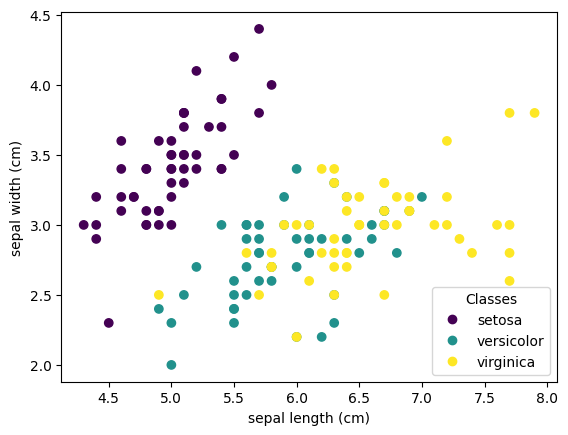

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()# Select 2 features / variables
X = iris.data[:, :] 
y = iris.target
feature_names = iris.feature_names
classes = iris.target_names

import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Task 3.1

1. and 2.

In [63]:
def confusionMatrix(y_true, y_pred, classes):
    n_classes = len(classes)
    confusionMat = np.zeros((n_classes, n_classes))
    for true, pred in zip(y_true, y_pred):
        confusionMat[true,pred] += 1
    return confusionMat

def plot_ConfusionMatrix(confusionMat, classes):
    ## Plot confusion matrix with color code
    plt.imshow(confusionMat, interpolation='nearest')
    ## create the legend
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Kernel: linear
One vs One Confusion Matrix:


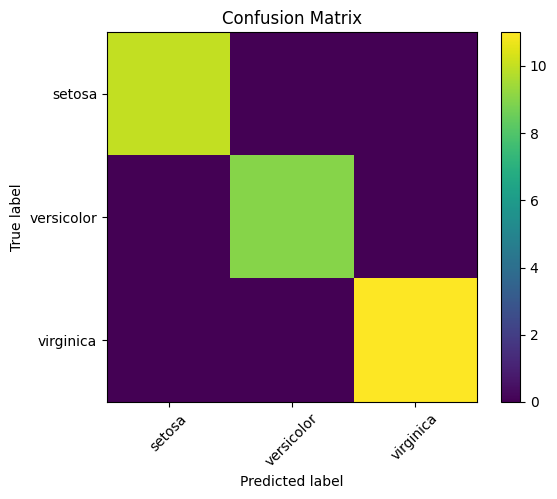

One vs Rest Confusion Matrix:


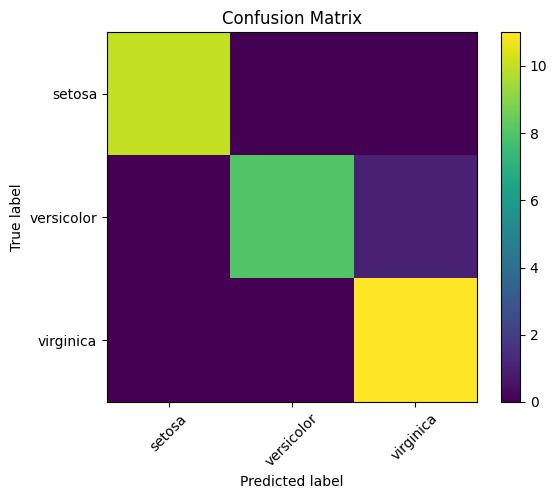

 Accuracy One vs One: 1.0
 Accuracy One vs Rest: 0.9666666666666667
F1 score One-vs-One: 1.0 
F1 score One-vs-Rest: 0.9664109121909632 
Kernel: rbf
One vs One Confusion Matrix:


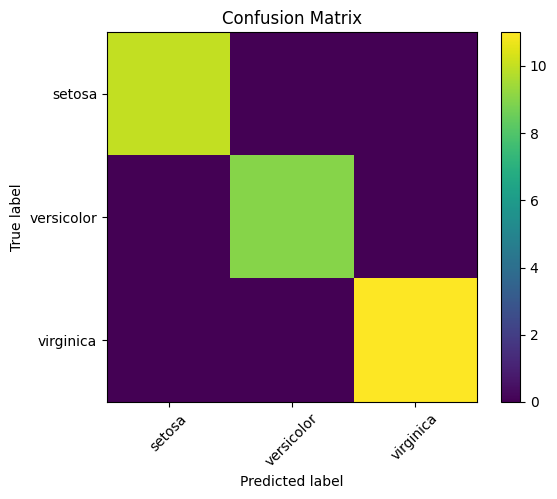

One vs Rest Confusion Matrix:


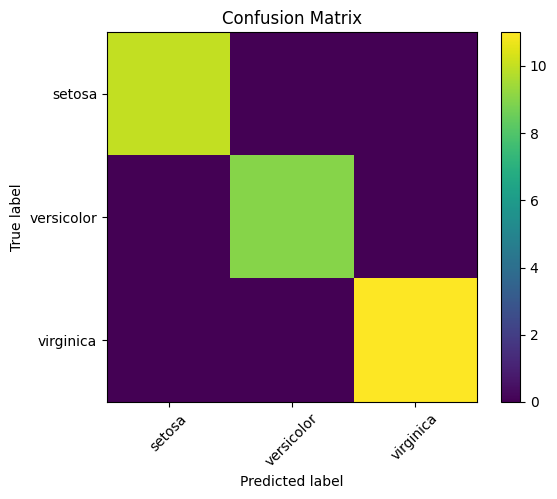

 Accuracy One vs One: 1.0
 Accuracy One vs Rest: 1.0
F1 score One-vs-One: 1.0 
F1 score One-vs-Rest: 1.0 
Kernel: poly
One vs One Confusion Matrix:


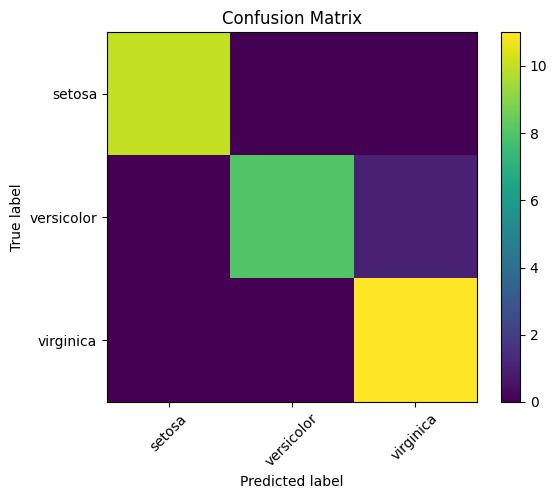

One vs Rest Confusion Matrix:


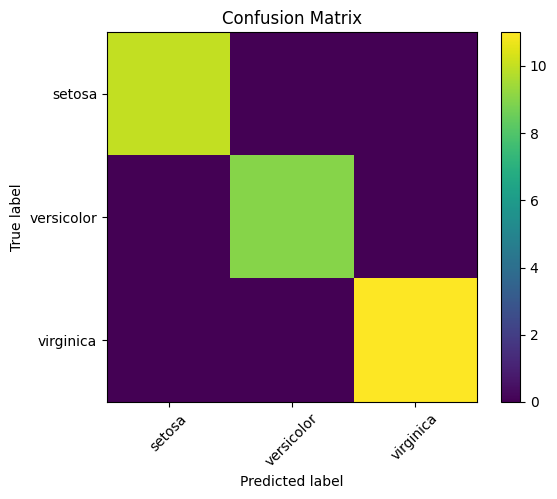

 Accuracy One vs One: 0.9666666666666667
 Accuracy One vs Rest: 1.0
F1 score One-vs-One: 0.9664109121909632 
F1 score One-vs-Rest: 1.0 


Best results:
Best F1 score One vs One: 1.0 with kernel : linear
Best F1 score One vs Rest: 1.0 with kernel : linear


In [ ]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

def F1_score(y_true, y_pred, classes):
    ## init of TP, FP, FN
    TruePositives = np.zeros(len(classes))
    FalsePositives = np.zeros(len(classes))
    FalseNegatives = np.zeros(len(classes))
    for i, cls in enumerate(classes):
        ## sum TP, FP, FN for each class
        for true, pred in zip(y_true, y_pred):
            if true == cls and pred == cls:
                TruePositives[i] += 1
            elif true != cls and pred == cls:
                FalsePositives[i] += 1
            elif true == cls and pred != cls:
                FalseNegatives[i] += 1
    ## compute Precision and Recall to find F1 score
    Precision = np.divide(TruePositives, TruePositives + FalsePositives)
    Recall = np.divide(TruePositives, TruePositives + FalseNegatives)
    F1 = np.divide(2 * Precision * Recall, Precision + Recall)
    return np.mean(F1)

def Accuracy(y_true, y_pred):
    Tp = np.sum(y_true == y_pred)
    return Tp / len(y_true)

kernels = ['linear', 'rbf', 'poly']
best_F1_ovo = 0
best_F1_ovr = 0
for kernel in kernels:
    model = svm.SVC(kernel=kernel, C=1.0) 
    ## Apply One vs One and Rest to our model
    ovoCla = OneVsOneClassifier(model) # use of sklearn's OneVsOneClassifier
    ovrCla = OneVsRestClassifier(model)
    ## Train
    ovoCla.fit(X_train, y_train)
    ovrCla.fit(X_train, y_train)
    ## Predict
    y_pred_ovo = ovoCla.predict(X_test)
    y_pred_ovr = ovrCla.predict(X_test)
    ## Apply confusion matrix 
    confMat_ovo = confusionMatrix(y_test, y_pred_ovo, classes)
    confMat_ovr = confusionMatrix(y_test, y_pred_ovr, classes)
    print(f"Kernel: {kernel}")
    print("One vs One Confusion Matrix:")
    plot_ConfusionMatrix(confMat_ovo, classes)
    print("One vs Rest Confusion Matrix:")
    plot_ConfusionMatrix(confMat_ovr, classes) 
    print(f" Accuracy One vs One: {Accuracy(y_test, y_pred_ovo)}")
    print(f" Accuracy One vs Rest: {Accuracy(y_test, y_pred_ovr)}")
    ## Compute F1 score
    f1_ovo = F1_score(y_test, y_pred_ovo, y_test)
    f1_ovr = F1_score(y_test, y_pred_ovr, y_test)
    print(f"F1 score One-vs-One: {f1_ovo} ")
    print(f"F1 score One-vs-Rest: {f1_ovr} ")
    ## Keep score of best F1 score to find best model
    best_F1_ovo = max(best_F1_ovo, f1_ovo)
    best_F1_ovr = max(best_F1_ovr, f1_ovr)

print("\n")
print("Best results:")
print(f"Best F1 score One vs One: {best_F1_ovo} with kernel : {kernels[np.argmax(best_F1_ovo)]}")
print(f"Best F1 score One vs Rest: {best_F1_ovr} with kernel : {kernels[np.argmax(best_F1_ovr)]}")

3.

In [ ]:
SupportVectors = ovrCla.estimators_[0].support_vectors_
SupportVectors

array([[5.1, 2.5, 3. , 1.1],
       [5.1, 3.3, 1.7, 0.5],
       [4.5, 2.3, 1.3, 0.3]])

4.

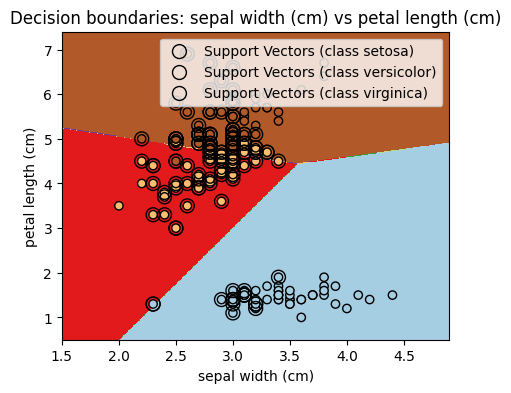

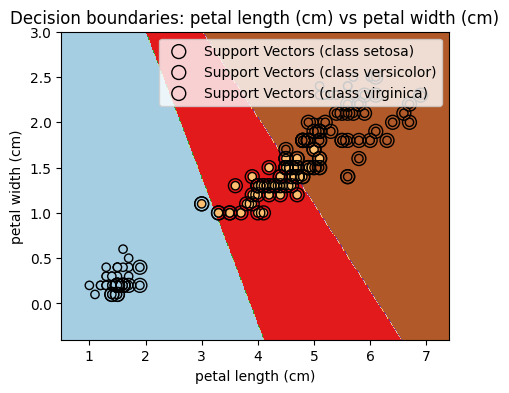

In [69]:
def plot_decision_boundaries(X, y, feature_idx, oneVsRest):
    f1, f2 = feature_idx
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min()- 0.5, X[:,1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300)) ## creates a grid of points covering the space with xx and yy coordinates matrices where each point will be classified by the model
    pred = oneVsRest.predict(np.c_[xx.ravel(), yy.ravel()]) ## flatten all grid proints to predict and classify 
    pred = pred.reshape(xx.shape) ## reshape back to the grid shape

    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, pred, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel(feature_names[f1])
    plt.ylabel(feature_names[f2])
    plt.title(f"Decision boundaries: {feature_names[f1]} vs {feature_names[f2]}")

    for i, est in enumerate(oneVsRest.estimators_):
        ## plot every support vector for each estimator
        plt.scatter(est.support_vectors_[:, 0], est.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label=f"Support Vectors (class {classes[i]})")

    plt.legend(loc='upper right')
    plt.show()



X_2vs3 = iris.data[:, 1:3] ## extract features 2 and 3 ( -1 because of python indexing)


oneVsRest_2vs3 = OneVsRestClassifier(svm.SVC(kernel='linear', C=1))
oneVsRest_2vs3.fit(X_2vs3, y)

plot_decision_boundaries(X_2vs3, y, [1, 2], oneVsRest_2vs3)

X_3vs4 = iris.data[:, 2:4]

oneVsRest_3vs4 = OneVsRestClassifier(svm.SVC(kernel='linear', C=1))
oneVsRest_3vs4.fit(X_3vs4, y)

plot_decision_boundaries(X_3vs4, y, [2, 3], oneVsRest_3vs4)


## Part 4

### Task 4.1

THe higher the dimensionality the higher the training time

Percentage of correct answers with dimension = 

    - 10 : [ 47.5%, 48.75% , 48.75%] => Average : 48.33%
    - 100 : [ 65%, 63.75%, 62.5% ] => Average : 63.75%
    - 1000 :  [67.5% , 65%, 67.5% ] => Average : 66.67%


We can notice that higher dimensionality leads to higher performance but also higher computation time. However the trend seems to be logarithmic as the increase in performance slows down. This can probably be explained that there can only be so much information and adds the risk of adding unnecessary parameters as well as the risk of overfiting.

### Task 4.2

To overcome this issue ones_number should be the same as window_size.

Accuracy of correct answers with dimension = 

    - 1000 : [ 71.25%, 75% , 70%] => Average : 72.1%
    - 4000 : [ 68.75%, 73.75%, 68.75% ] => Average :70.42 %
    - 10000 :  [75%, 71.25%  , 75%] => Average : 73.33%

The performance seems to stay about the same for all dimensions (but still higher for higher dimensions) and the accuracy also seems to stay consistant. It's also better then for word2Vec.

For the synonym detection task, Word2Vec shows improving accuracy with higher dimensionality. However this gain quickly saturates indicating diminishing returns and a higher risk of overfitting. Random Indexing achieves stable and slightly higher accuracy across dimensions, demonstrating its robustness despite its simplicity. Computationally, RI is far more efficient compared to Word2Vec that trains on the entire vocabulary. Overall Word2Vec provides richer embeddings at higher cost that aren't always enough for good performance whereas RI offers a faster lightweight alternative.